#### Nom et prenom = Marieme Gessy Gadiaga
#### Nom et prenom = Marie Claire Coly
#### Classe = LIG3 UCAO

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

On va importer le bibliotheque necessaire pour notre analyse

## 1-Preparation des donnees

- Téléchargez le jeu de données et nettoyage de donnees si necessaire

In [5]:
df = pd.read_csv("winequality-red.csv", sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Les valeur manquantes
nbre_val_manq = df.isnull().sum()
col_manq = nbre_val_manq / df.shape[0]
col_manq

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

- Comme nous le voyons ci dessus, il n''y a pas de valeur manquantes dans notre Dataset alors on peut proceder a l'analyse; notre Dataset ne necessite pas un nettoyage prealable.Cependant si il y avait eu des valeur manquantes, soit on aurai fait une imputation par le moyenne ou on aurai supprimer les colonnes.

#### comprehension des variables presentes 
- ici nous voulons predire la qualite du vin alors notre target sera 'quality' et le reste sera les features pour dire c'est a partir des features que l'on saura si le vin est de bonne qualiter on pas

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 2-Exploration des donnees

- Analyse descriptive : cette analyse nous permettra d'avoir la moyenne, le max, le min, l'ecart-type, les quartilles


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### VISUALISATIONS

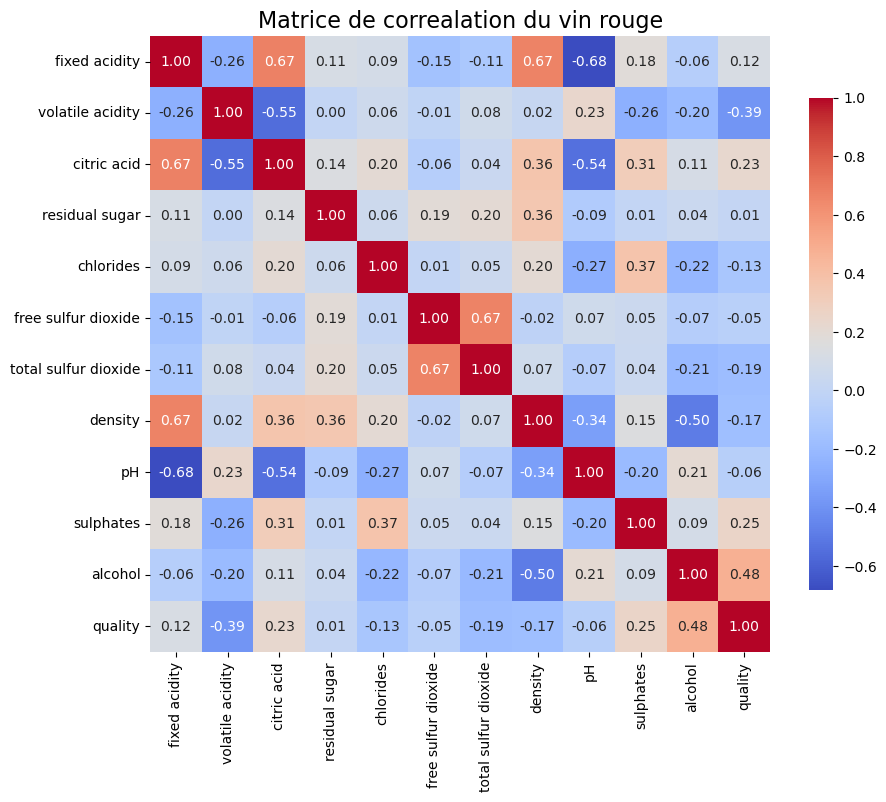

In [14]:
# Matrice de correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt= ".2f", cmap="coolwarm", cbar_kws={"shrink":0.8})
plt.title("Matrice de correalation du vin rouge", fontsize=16)
plt.show()

- cette carte nous permet de visualiser de maniere rapide et precise les relation lineaire entre les differentes variable du jeu de donnees. les couleurs chaudes tels que le rouge indique une correlation positif tandis que les couleurs froide tel que le bleu indiques une correlation negatif.
- cette visualisation nous permet de voir les variable qui on une forte influence sur le qualite du vin, ce qui sera utile pour la prediction.

C:\Users\pc\AppData\Local\Temp\ipykernel_868\3140754054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')


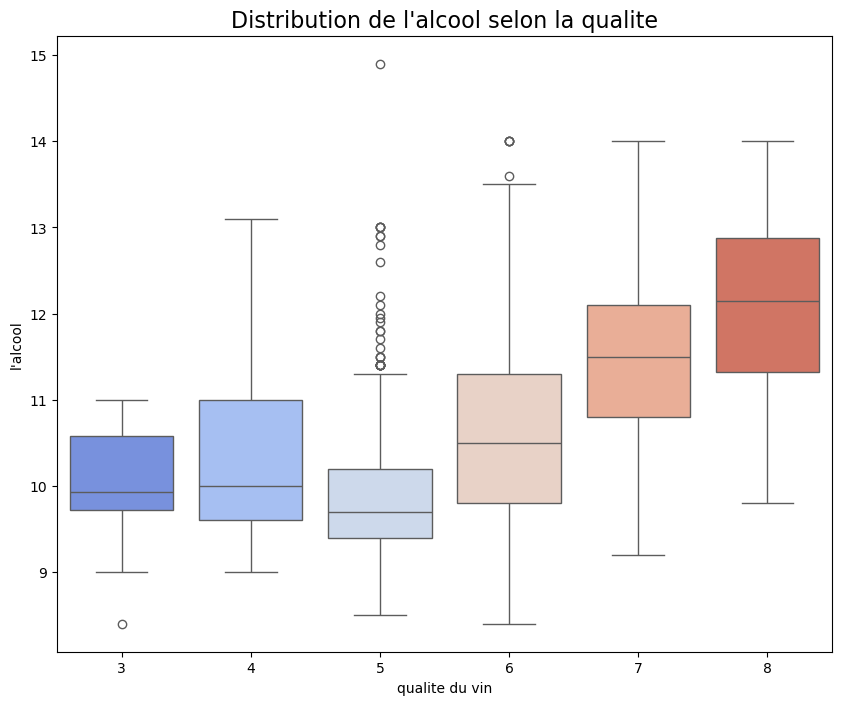

In [16]:
# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')
plt.title("Distribution de l'alcool selon la qualite", fontsize=16)
plt.xlabel("qualite du vin")
plt.ylabel("l'alcool")
plt.show()

- grace a ce boxplot, nous pouvons en conclure que l'alcool est une variable importante dans la qualite du vin; pour dire que l'un des meilleur vin a une teneur en vin plus eleve (6 a 8). neamoins nous pouvons apercevoir des outliers ou la teneur d'alcool est faible (3 a 5).

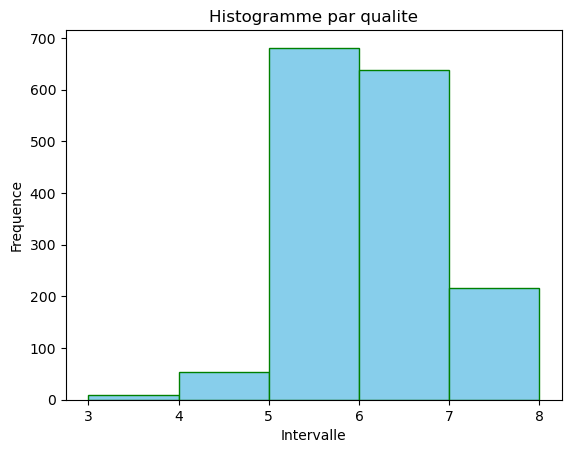

In [18]:
# Histogramme
plt.hist(df['quality'], bins=5, color='skyblue', edgecolor='green' )
plt.title("Histogramme par qualite")
plt.xlabel("Intervalle")
plt.ylabel("Frequence")
plt.show()

- ce diagrame nous montre que la qualite de vin dans ce dataset sont moyenne.

#### 3-CREATION DU MODELE

- On va separer nos donnees et sortir le target qui est la qualite

In [22]:
X = df.drop('quality', axis=1)
y = df['quality']

- on entraine notre modele

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

### modele de regression lineaire : modele utiliser pour analyser la relation entre une variable dependante avec 1 ou plusieurs variable independantes

In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [27]:
m_pred = model_lr.predict(X_test)

In [28]:
#pour la prediction
model_lr.predict(X_test)

array([5.87158915, 6.0752091 , 5.50936368, 5.65301989, 5.09885455,
       6.19737127, 5.16975279, 5.10281501, 5.8445906 , 6.53482443,
       5.33783661, 5.32979371, 5.34528445, 5.6004217 , 4.95788071,
       5.2442371 , 5.04867137, 5.48041231, 5.63447367, 5.02564313,
       5.94002698, 6.30631202, 5.04965602, 4.97121817, 5.15540414,
       5.60063109, 4.35125278, 6.11472447, 5.49272283, 5.40407304,
       5.96175195, 5.69427741, 6.17505414, 5.50702162, 4.93323729,
       5.99349432, 5.8207698 , 5.34548987, 5.43046294, 5.53972857,
       6.14100111, 5.22740519, 5.0382208 , 4.95264464, 6.3833742 ,
       5.63845842, 5.46109821, 5.05799667, 4.94320821, 5.50963335,
       5.42081769, 5.55815764, 6.20066937, 4.86227576, 5.25606649,
       5.20171651, 4.93920631, 6.41092384, 6.43466794, 5.8567304 ,
       5.51153418, 5.87879847, 5.73526066, 5.15931232, 4.96003985,
       6.4427276 , 5.61076153, 6.21573661, 5.71612654, 6.53537805,
       5.07498819, 5.03623259, 6.42078703, 4.9045203 , 5.19021

### modele SVM : modele qui cherche a predire a maximisant la marche

In [30]:

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [31]:
ms_pred = model_svr.predict(X_test)

In [32]:
#pour la prediction
model_svr.predict(X_test)

array([6.02028571, 5.52537073, 5.80181884, 5.78526537, 5.21066885,
       5.78446743, 5.67978867, 5.17861522, 5.87726269, 6.02021117,
       5.47928193, 5.46139319, 5.75356871, 5.88257095, 5.01515997,
       5.72883706, 5.46132997, 5.7404106 , 5.45329617, 5.59404839,
       5.84613646, 5.86479012, 5.50870205, 4.99127345, 5.45777487,
       5.71929366, 5.79347807, 5.96142226, 5.72422799, 5.87867642,
       5.47352913, 5.60717201, 6.05986201, 5.81147352, 5.68661755,
       5.38901331, 5.26213175, 5.9377533 , 5.33394931, 5.77569183,
       6.0098562 , 5.65674388, 5.73869868, 5.06455678, 6.09306502,
       5.75787383, 5.53251144, 5.07095346, 5.00758821, 5.61158734,
       5.62898648, 5.83501746, 5.60877675, 5.16318118, 5.67664517,
       5.59296167, 5.05692966, 6.0505091 , 5.93558476, 5.89784998,
       5.55498657, 5.61980809, 5.81045857, 4.99965236, 5.29334447,
       6.08703838, 5.7705931 , 5.96374233, 5.95656009, 5.88388194,
       5.55014083, 5.70443707, 5.93292156, 5.03819598, 5.12776

### Random Forest : modele dont la prediction est moyennees pour ameliorer la precision, elle convient plus a ce type de donnees.

In [34]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# predire le model
p_rf= model_rf.predict(X_test)
p_rf

array([5.86, 5.88, 5.44, 5.11, 5.22, 5.98, 5.11, 5.03, 5.29, 5.91, 5.23,
       5.26, 5.68, 5.57, 5.15, 5.37, 5.32, 5.77, 5.46, 5.12, 5.93, 6.21,
       5.11, 5.16, 5.53, 5.88, 4.29, 6.08, 5.92, 5.28, 5.99, 5.88, 6.11,
       5.15, 4.49, 5.88, 5.82, 5.54, 5.92, 5.88, 5.69, 5.13, 4.93, 5.34,
       6.44, 5.49, 5.35, 5.31, 5.05, 5.52, 5.15, 5.46, 6.08, 5.57, 5.06,
       5.47, 5.27, 6.17, 6.19, 5.91, 5.27, 5.87, 6.1 , 5.06, 5.17, 6.48,
       5.44, 6.57, 5.9 , 6.67, 5.08, 4.73, 6.86, 5.09, 5.11, 5.28, 6.97,
       5.08, 5.05, 5.07, 6.1 , 5.28, 6.09, 6.68, 6.36, 5.94, 5.19, 5.87,
       5.1 , 6.24, 5.75, 5.72, 6.76, 5.06, 4.99, 6.9 , 6.21, 6.81, 5.06,
       6.25, 5.12, 6.13, 6.12, 5.2 , 6.61, 6.52, 5.21, 5.67, 5.46, 6.16,
       5.14, 5.38, 6.03, 5.96, 5.11, 5.  , 5.75, 5.28, 5.45, 4.98, 6.31,
       5.62, 5.63, 6.28, 5.37, 5.97, 6.44, 5.68, 5.97, 6.37, 6.04, 4.71,
       6.05, 5.41, 5.42, 5.04, 5.2 , 5.47, 5.48, 4.76, 5.88, 5.24, 6.41,
       5.58, 6.57, 5.94, 5.37, 5.04, 5.09, 5.33, 5.

-Le modeles adequat
Semble etre la methode de la regression car notre target est une valeur continue, on doit note la qualite du vin 
Et cela sur une echelle de 0 a 10.

#### Parametres de differents modeles

In [38]:
model_lr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [39]:
model_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Evaluation des performances du modele avec les metrics
 

- pour la regression lineaire

In [43]:

(mean_squared_error(y_test, m_pred)) 


0.4362883254697749

In [44]:
(r2_score(y_test, m_pred))

0.3303923541441378

In [45]:
model_lr.score(X_test, y_test)

0.3303923541441378

- pour svm 

In [47]:

(mean_squared_error(y_test, ms_pred))


0.5562819163952114

In [48]:
(r2_score(y_test, ms_pred))

0.14622830196406345

In [49]:
model_svr.score(X_test, y_test)

0.14622830196406345

- pour random forest

In [51]:
(mean_squared_error(y_test, p_rf)) 


0.33501145833333335

In [52]:
(r2_score(y_test, p_rf))

0.4858303079556884

In [53]:
model_rf.score(X_test, y_test)

0.4858303079556884

- Apres evaluation des modeles nous remarquons que le modele avec le plus de surete est le Random forest qui a le r2 plus proche de 1 et avec moins de chance de faire des erreur que les autres qui sont moins fiable de part leur RMSE.

### Optimisation des hyperparametres

In [56]:
params = {
     'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}   

In [57]:
grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)  

In [58]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [98]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

In [101]:
model = grid.best_estimator_

In [106]:
model.score(X_test , y_test)

0.4946063056641731

- ici, comme on peut le voir, on a optimiser le meilleur modele Random Forest pour voir quesl sont les meilleur parametres a utiliser pour avoir un meilleur resultat.
  
- Ainsi, on vera son pourcentatnge de fiabilite, il n'est pas tres bon mais il est meilleur que les autres ce qui prouve encore que le Random Forest est le meilleure modele a utiliser pour ce Dataset.